In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0137

Best Fitness:	600.0088
Solution:	600.0000
Diff:		0.0088

[0:12:46][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0699

Best Fitness:	600.0461
Solution:	600.0000
Diff:		0.0461

[0:25:14][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0185

Best Fitness:	600.0112
Solution:	600.0000
Diff:		0.0112

[0:37:22][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0641

Best Fitness:	600.0440
Solution:	600.0000
Diff:		0.0440

[0:48:13][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0316

Best Fitness:	600.0169
Solution:	600.0000
Diff:		0.0169

[0:59:15][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0230

Best Fitness:	600.0146
Solution:	600.0000
Diff:		0.0146

[1:09:21][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0486

Best Fitness:	600.0324
Solution:	600.0000
Diff:		0.0324

[1:19:40][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0224

Best Fitness:	600.0102
Solution:	600.0000
Diff:		0.0102

[1:30:12][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0353

Best Fitness:	600.0222
Solution:	600.0000
Diff:		0.0222

[1:39:53][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0351

Best Fitness:	600.0201
Solution:	600.0000
Diff:		0.0201

[1:49:21][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0306

Best Fitness:	600.0179
Solution:	600.0000
Diff:		0.0179

[1:58:27][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0468

Best Fitness:	600.0246
Solution:	600.0000
Diff:		0.0246

[2:07:38][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0476

Best Fitness:	600.0335
Solution:	600.0000
Diff:		0.0335

[2:16:46][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0248

Best Fitness:	600.0149
Solution:	600.0000
Diff:		0.0149

[2:25:23][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0350

Best Fitness:	600.0152
Solution:	600.0000
Diff:		0.0152

[2:33:08][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.9837

Best Fitness:	600.9536
Solution:	600.0000
Diff:		0.9536

[2:40:54][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	601.0580

Best Fitness:	601.0304
Solution:	600.0000
Diff:		1.0304

[2:48:48][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0715

Best Fitness:	600.0473
Solution:	600.0000
Diff:		0.0473

[2:56:48][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0321

Best Fitness:	600.0194
Solution:	600.0000
Diff:		0.0194

[3:04:45][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.9805

Best Fitness:	600.9519
Solution:	600.0000
Diff:		0.9519

[3:11:45][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0672

Best Fitness:	600.0421
Solution:	600.0000
Diff:		0.0421

[3:18:25][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0374

Best Fitness:	600.0244
Solution:	600.0000
Diff:		0.0244

[3:25:06][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0355

Best Fitness:	600.0200
Solution:	600.0000
Diff:		0.0200

[3:31:43][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0461

Best Fitness:	600.0299
Solution:	600.0000
Diff:		0.0299

[3:38:22][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.9489

Best Fitness:	600.9253
Solution:	600.0000
Diff:		0.9253

[3:44:37][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0220

Best Fitness:	600.0134
Solution:	600.0000
Diff:		0.0134

[3:50:17][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0263

Best Fitness:	600.0150
Solution:	600.0000
Diff:		0.0150

[3:55:50][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0257

Best Fitness:	600.0161
Solution:	600.0000
Diff:		0.0161

[4:01:25][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0231

Best Fitness:	600.0125
Solution:	600.0000
Diff:		0.0125

[4:07:00][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0375

Best Fitness:	600.0231
Solution:	600.0000
Diff:		0.0231

[4:12:21][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0308

Best Fitness:	600.0197
Solution:	600.0000
Diff:		0.0197

[4:16:48][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0296

Best Fitness:	600.0184
Solution:	600.0000
Diff:		0.0184

[4:21:15][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0169

Best Fitness:	600.0110
Solution:	600.0000
Diff:		0.0110

[4:25:40][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	601.0218

Best Fitness:	600.9682
Solution:	600.0000
Diff:		0.9682

[4:30:13][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0231

Best Fitness:	600.0145
Solution:	600.0000
Diff:		0.0145

[4:34:41][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0419

Best Fitness:	600.0275
Solution:	600.0000
Diff:		0.0275

[4:38:32][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0219

Best Fitness:	600.0148
Solution:	600.0000
Diff:		0.0148

[4:41:58][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0488

Best Fitness:	600.0321
Solution:	600.0000
Diff:		0.0321

[4:45:24][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0475

Best Fitness:	600.0293
Solution:	600.0000
Diff:		0.0293

[4:48:48][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0327

Best Fitness:	600.0209
Solution:	600.0000
Diff:		0.0209

[4:52:13][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0329

Best Fitness:	600.0197
Solution:	600.0000
Diff:		0.0197

[4:55:16][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0366

Best Fitness:	600.0250
Solution:	600.0000
Diff:		0.0250

[4:58:00][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0232

Best Fitness:	600.0142
Solution:	600.0000
Diff:		0.0142

[5:00:43][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0457

Best Fitness:	600.0297
Solution:	600.0000
Diff:		0.0297

[5:03:26][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0267

Best Fitness:	600.0179
Solution:	600.0000
Diff:		0.0179

[5:06:10][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0378

Best Fitness:	600.0245
Solution:	600.0000
Diff:		0.0245

[5:08:37][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0425

Best Fitness:	600.0258
Solution:	600.0000
Diff:		0.0258

[5:10:57][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0329

Best Fitness:	600.0226
Solution:	600.0000
Diff:		0.0226

[5:13:16][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0355

Best Fitness:	600.0216
Solution:	600.0000
Diff:		0.0216

[5:15:35][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.0768

Best Fitness:	600.0459
Solution:	600.0000
Diff:		0.0459

[5:17:55][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	600.9299

Best Fitness:	600.9106
Solution:	600.0000
Diff:		0.9106

[5:20:24][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:20:24

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,0.929273,0.931790,0.923975,0.931315,0.933105,0.936459,0.936725,0.931659,0.930616,0.938125,...,0.927428,0.928537,0.935836,0.933632,0.934814,0.939950,0.935065,0.929182,0.936490,50
327,0.929273,0.931790,0.923975,0.931315,0.933105,0.936459,0.936725,0.928003,0.930616,0.926941,...,0.927428,0.928537,0.935836,0.933632,0.934814,0.939950,0.935065,0.929182,0.936490,50
328,0.929273,0.931790,0.923975,0.931315,0.933105,0.936459,0.936725,0.928003,0.930616,0.926941,...,0.927428,0.928537,0.935836,0.933632,0.920080,0.939950,0.935065,0.929182,0.934288,50
329,0.929273,0.924235,0.923975,0.930267,0.933105,0.936459,0.928757,0.928003,0.926004,0.926941,...,0.927428,0.928537,0.935836,0.931594,0.920080,0.930632,0.933304,0.929182,0.934288,50
330,0.929273,0.924235,0.923975,0.930267,0.933105,0.936459,0.928757,0.928003,0.926004,0.926941,...,0.927428,0.928537,0.933483,0.931594,0.920080,0.930632,0.933304,0.929182,0.934288,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.008752941273769466

Best error for run 1: 0.046071911153831024

Best error for run 2: 0.011222076184253638

Best error for run 3: 0.04402632100948267

Best error for run 4: 0.016892471154733357

Best error for run 5: 0.014616810776146849

Best error for run 6: 0.03236213946081534

Best error for run 7: 0.01017982828636832

Best error for run 8: 0.022220277991436888

Best error for run 9: 0.0201229523775055

Best error for run 10: 0.017900868713240925

Best error for run 11: 0.024649311497114468

Best error for run 12: 0.0334676661686899

Best error for run 13: 0.014859249449500567

Best error for run 14: 0.01515653245098747

Best error for run 15: 0.9536003390500127

Best error for run 16: 1.0304289903147037

Best error for run 17: 0.04734013894972122

Best error for run 18: 0.019419154412730677

Best error for run 19: 0.9518671548738666

Best error for run 20: 0.0420799629649764

Best error for run 21: 0.024424452309290245

Best error for run 22: 0.020046796017936686

Best error for run 23: 0.029863616708439622

Best error for run 24: 0.9252823902389764

Best error for run 25: 0.013371703629104559

Best error for run 26: 0.015018999829294444

Best error for run 27: 0.01611717694777326

Best error for run 28: 0.012489690155348399

Best error for run 29: 0.023085462531071244

Best error for run 30: 0.019710490424017735

Best error for run 31: 0.01835268422144054

Best error for run 32: 0.010961726777395597

Best error for run 33: 0.9682202529764936

Best error for run 34: 0.01448011910713376

Best error for run 35: 0.02747759187468546

Best error for run 36: 0.01475888407480852

Best error for run 37: 0.032129539885545455

Best error for run 38: 0.0292996173938036

Best error for run 39: 0.020938986440455665

Best error for run 40: 0.019693999927085315

Best error for run 41: 0.025046409892183874

Best error for run 42: 0.014161122747395893

Best error for run 43: 0.029712412083426898

Best error for run 44: 0.017925416122011484

Best error for run 45: 0.02454460556145932

Best error for run 46: 0.025759570881291438

Best error for run 47: 0.02258970077741651

Best error for run 48: 0.0215844281350428

Best error for run 49: 0.04594537876744198

Best error for run 50: 0.9105513063395847

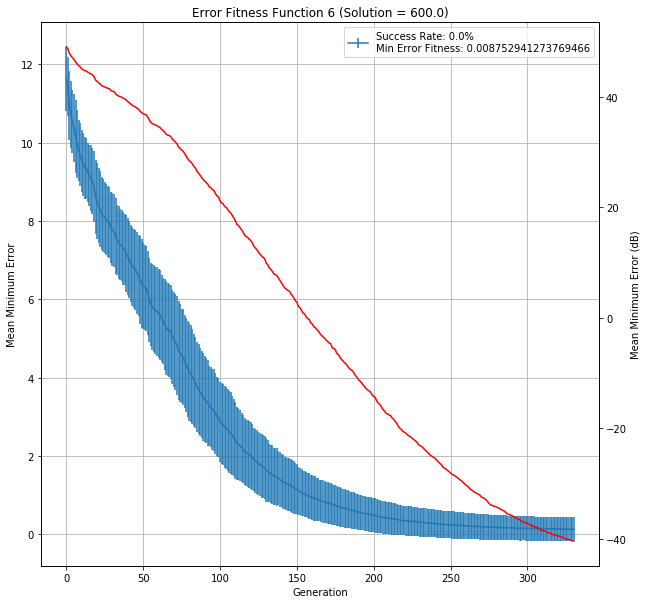

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,1.0,0.008753,0.046072,0.011222,0.044026,0.016892,0.014617,...,0.017925,0.024545,0.02576,0.02259,0.021584,0.045945,0.910551,0.13276,5:20:24,99900
